In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data


In [ ]:
df = pd.read_csv('/content/1653227978861-boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# 1. Split Data
## train - validate - test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

# 2. Draw correlation plot on training data and perform feature selection on highly correlated features

In [ ]:
# calulcate vif scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There are several feature with high VIF scores:

1.nox

2.dis

3.rad

4.tax

---



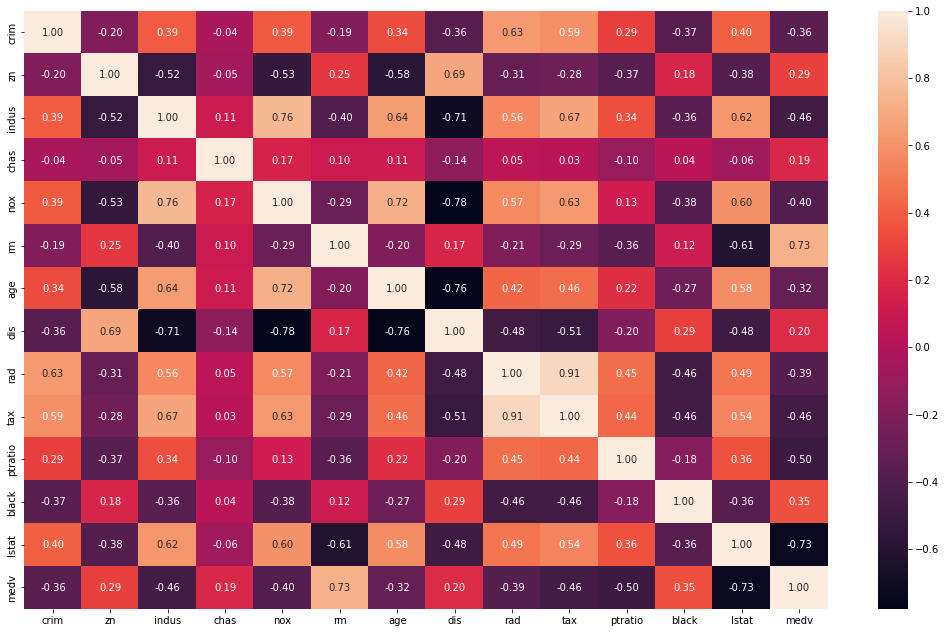

In [ ]:
#Heatmap Correlation
df_train = pd.concat([feature_df_train, target_df_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(18,11))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

The Top to retain fitur tax correlation with rad.

The value is 0.91.

There is not redundant. So We do not need to drop. ( pemahaman saya bakal di drop apabila terdapat correlation fitur lebih dari satu baru di drop ( lebih dari 0.8 (+-)). Oleh karena itu saya tidak melakukan drop meskipun nilai VIF ada 4 fitur high VIF scores.

#3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10])

##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)



Ridge(alpha=10, random_state=42)

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
ridge_reg_pointone = Lasso(alpha=0.1, random_state=42)
ridge_reg_one = Lasso(alpha=1, random_state=42)
ridge_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)


Lasso(alpha=10, random_state=42)

#4. Choose the best lambda from the validation set

##Ridge

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.824336534783036
RMSE of Ridge regression model with alpha = 0.1 is 4.814871021929369
RMSE of Ridge regression model with alpha = 1.0 is 4.789449769284769
RMSE of Ridge regression model with alpha = 10 is 4.756914989741643


ridge_reg_ten is the best RMSE of Ridge regression model (RMSE makin kecil makin bagus)

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,18.386848
1,crim,-0.100071
2,zn,0.040256
3,indus,-0.023681
4,chas,1.745834
5,nox,-1.666441
6,rm,4.602393
7,age,-0.010352
8,dis,-1.246976
9,rad,0.214226


salah satu interpretasinya : jadi ketika intercept naik 1 poin dengan menganggap fitur yang lain tetap maka dia akan berasosiasi dengan kenaikan medv sebanyak 18.386848

##Lasso

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.802335557883491
RMSE of Lasso regression model with alpha = 0.1 is 4.802435126536561
RMSE of Lasso regression model with alpha = 1.0 is 4.722183144510946
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


lasso_reg_one is the best RMSE of Lasso regression model 
(RMSE makin kecil bagus)


In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,29.188142
1,crim,-0.066563
2,zn,0.030746
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.286992
7,age,0.023834
8,dis,-0.626395
9,rad,0.176576


salah satu interpretasinya : jadi ketika intercept naik 1 poin dengan menganggap fitur yang lain tetap maka dia akan berasosiasi dengan kenaikan medv sebanyak 29.188142

#5. Evaluate the best models on the test data (+ interpretation)

#Ridge

##*Diagnostic Study* 

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.75303289781423


sebanyak 0.75303289781423 (75%) variabel yang termasuk dalam model bisa menjelaskan nilai y.

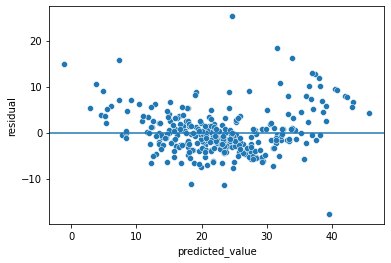

In [ ]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi: 
1. Linear Relationship: OK. garis horizontal y=0 cukup mempresentasikan titik dominan keseluruhan residual.
2.Variance Stable: Yes. Variasinya membentuk  dominansi ditengah.
3. Independent Residual: No. Ada Pattern yang mencolok pada residualis yang berdekatan.

##*Training Error*

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 4.7362049712885055
MAE for training data is 3.3972627626346314
MAPE for training data is 0.1712873073455594


kurang acceptable karena MAPEnya diatas 10%. cuman mendekati hasil testingnya sih.





##*Testing Error* 

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 5.013885375104995
MAE for testing data is 3.1371774927154625
MAPE for testing data is 0.16870141198536087


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_df_test, y_predict_test)
mean_absolute_percentage_error(y_df_test, y_predict_test)

0.16870141198536087

kurang acceptable karena MAPEnya diatas 10%. cuman mendekati hasil testingnya sih.

#Lasso

##*Diagnostic Study* 

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.7110648131930517


sebanyak 0.7110648131930517 (71%) variabel yang termasuk dalam model bisa menjelaskan nilai y.

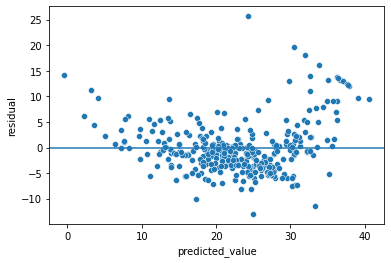

In [ ]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsi: 
1. Linear Relationship: OK. garis horizontal y=0 cukup mempresentasikan titik dominan kesuluraha residual.
2.Variance Stable: No. Variasinya membentuk huruf U dengan dominansi ditengah bawah.
3. Independent Residual: No. Ada Pattern yang mencolok pada residualis yang berdekatan.

##*Training Error*

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_df_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 5.122844262726739
MAE for training data is 3.66444893842456
MAPE for training data is 0.17477875603845897


kurang ACCEPTABLE karena MAPEnya diatas 10%. cuman mendekati hasil testingnya sih.



##*Testing Error* 

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 4.953658325185925
MAE for testing data is 3.234242769527763
MAPE for testing data is 0.1694777237400748


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_df_test, y_predict_test)
mean_absolute_percentage_error(y_df_test, y_predict_test)

0.1694777237400748

kurang ACCEPTABLE karena MAPEnya diatas 10%. cuman mendekati hasil testingnya sih.